# Computational Mathematics
## An Introduction to Numerical Analysis and Scientific Computing with Python
### By Dimitrios Mitsotakis

# Chapter 11: Unconstrained Optimization and Neural Networks

Optimization is the branch of computational mathematics that deals with the minimization of functions $f({\bf x})$. We start with the method of steepest descent.

## Method of Steepest Descent 

The method of steepest descent is the iterative method defined by the iteration
$${\bf x}^{(k+1)}={\bf x}^{(k)}-\lambda_k\nabla f({\bf x}^{(k)}),\quad k=0,1,\dots$$
where ${\bf x}^{(0)}$ is a given initial guess and
$$\lambda_k=argmin(f({\bf x}^{(k)}-\lambda \nabla f({\bf x}^{(k)})))\ .$$

We usually compute the value of $\lambda_k$ approximatly by solving appropriate equation. Here we use the function `scipy.optimize.golden`.

An algorithm of the steepest descent method is the following:

- Set a tolerance $TOL$ for the accuracy
- Initialize ${\bf x}^{(k)}$ in the domain of $f$ and set $k=0$
- While $\|\nabla f({\bf x}^{(k)})\|>TOL$ or $\|{\bf x}^{(k+1)}-{\bf x}^{(k)}\|>TOL$
    - Find $\lambda_k=argmin_{\lambda>0} f({\bf x}^{(k)}-\lambda \nabla f({\bf x}^{(k)}))$
    - Compute ${\bf x}^{(k+1)}={\bf x}^{(k)}-\lambda_k \nabla f({\bf x}^{(k)})$
    - Increase the counter $k=k+1$
- EndWhile
- Return the approximation ${\bf x}^{(k)}$ 

And the implementation is as follows:

In [1]:
import numpy as np
import numpy.linalg as npl
import scipy.optimize as spo

def steepestdescent(f,df,x0,tol=1.e-3,maxit=50):
    x = x0
    r = df(x0)
    iters = 0
    while ( np.abs(npl.norm(r))>tol and iters<maxit ):
        lambda_k = spo.golden(g,(x,r))
        x = x - lambda_k * r
        r = df(x)
        iters += 1
    return x

As an example, we consider the function $f(x_1,x_2)=x_1^2/2+5x_2^2/2$ which has its minimum value at the point ${\bf x}^\ast=(0,0)$. As an initial guess we consider the value ${\bf x}^{(0)}=(2,1)$. Using a tolerance \texttt{tol=1.e-8} we are able to achieve a very accurate solution within a few iterations.


In [2]:
def f(x):
    return 0.5*x[0]**2 + 2.5*x[1]**2
def df(x):
    return np.array([x[0], 5*x[1]])
def g(lambda_k,x,r):
    return f(x - lambda_k*r)
x0 = np.array([2.0,1.0])
x=steepestdescent(f, df, x0, tol = 1.e-8, maxit = 50)
print('x = ', x)

x =  [ 6.2403221e-09 -4.9922576e-10]


The following code shows the orthogonal directions we follow using the method of steepest descent

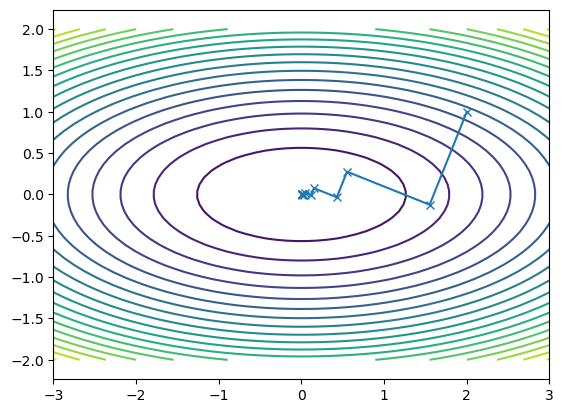

In [3]:
import matplotlib.pyplot as plt

def steepestdescent(f,df,x0,tol=1.e-3,maxit=50):
    xk = x0
    x = [xk]
    r = df(x0)
    iters = 0
    while (np.abs(npl.norm(r))>tol and iters<maxit):
        lambda_k = spo.golden(g,(xk,r))
        xk = xk - lambda_k * r
        r = df(xk)
        x.append(xk)
        iters += 1
    return x

x0 = np.array([2.0,1.0])
x = steepestdescent(f,df,x0,tol=1.e-3,maxit=50)
xmesh, ymesh = np.mgrid[-3:3:50j,-2:2:50j]
fmesh = f(np.array([xmesh, ymesh]))
plt.axis("equal")
plt.contour(xmesh, ymesh, fmesh, 20)
it_array = np.array(x)
plt.plot(it_array.T[0], it_array.T[1], "x-")
plt.show()

## Conjugate Gradient Method

Here we consider the conjugate gradient method for linear systems. The diretions here are chosen to be conjugate and an algorithm is the following:

- Set a tolerance $TOL$ for the accuracy
- Initialize ${\bf x}^{(0)}=0$, ${\bf r}^{(0)}={\bf A}{\bf x}^{(0)}-{\bf b}$, ${\bf p}^{(0)}=-{\bf r}^{(0)}$
- Initialize $k=0$
- While $\|{\bf r}^{(k)}\|>TOL$ or $\|{\bf x}^{(k+1)}-{\bf x}^{(k)}\|>TOL$
    - Compute $\lambda_k=\frac{\langle {\bf r}^{(k)},{\bf r}^{(k)}\rangle}{\langle {\bf p}^{(k)},{\bf A}{\bf p}^{(k)}\rangle}$
    - Compute ${\bf x}^{(k+1)}={\bf x}^{(k)}-\lambda_k {\bf p}^{(k)}$
    - Compute ${\bf r}^{(k+1)}={\bf r}^{(k)}+\lambda_k{\bf A}{\bf p}^{(k)}$
    - Compute $\beta_{k+1}=\frac{\langle {\bf r}^{(k+1)},{\bf r}^{(k+1)}\rangle}{\langle {\bf r}^{(k)},{\bf r}^{(k)}\rangle}$
    - Compute ${\bf p}^{(k+1)}=-{\bf r}^{(k+1)}+\beta_{k+1}{\bf p}^{(k)}$
    - Increase the counter $k=k+1$
- EndWhile
- Return the approximation ${\bf x}^{(k)}$ 

An implementation of the conjugate gradient method for linear systems is the following

In [4]:
def conjgrad(A,b,x0,tol=1.e-3,maxit=50):
    x = x0.copy()
    r = np.dot(A,x0) - b
    p = - r.copy()
    iters = 0
    while (npl.norm(r)>tol and iters<maxit):
        # Compute the products
        Ap = np.dot(A,p)
        r_dot_r = np.sum(r*r)
        p_dot_Ap = np.sum(p*Ap)
        # Compute the parameters and the unknowns
        lam = r_dot_r / p_dot_Ap
        x = x + lam * p
        r = r + lam * Ap
        beta = np.sum(r*r)/r_dot_r
        p = - r + beta * p
        iters += 1
    return x

For testing we consider the linear system ${\bf A}{\bf x}={\bf b}$ with
$${\bf A}=\begin{pmatrix}
2 & -1 & 0 \\
-1 & 2 & -1\\
0 & -1 & 2
\end{pmatrix}
\quad \mbox{and} \quad {\bf b}=\begin{pmatrix}1\\ 0 \\ 1\end{pmatrix}\ ,$$
which has the exact solution ${\bf x}=(1,1,1)^T$. As initial condition we choose the vector ${\bf x}^{(0)}=(0,0,0)^T$.

In [5]:
A = np.array([[2.0, -1.0, 0.0],[-1.0, 2.0, -1.0],[0.0, -1.0, 2.0]])
b = np.array([[1],[0],[1]])
x0 = np.zeros((3,1))
x= conjgrad(A, b, x0)
print('x = '); print(x)

x = 
[[1.]
 [1.]
 [1.]]


The module `scipy.sparse.linalg` is equiped with an implementation of the conjugate gradient method in the function `cg`. Here is an example of its usage:

In [6]:
from scipy.sparse.linalg import cg
A = np.array([[2.0, -1.0, 0.0],[-1.0, 2.0, -1.0],[0.0, -1.0, 2.0]])
b = np.array([[1],[0],[1]])
x0 = np.zeros((3,1))
print( cg(A,b,x0) )

(array([1., 1., 1.]), 0)


## Introduction to Neural Networks

In order to execute the codes that require the module `sklearn` you need to install first the scikit-learn environment.

As a first example we demonstrate the use of neural networks in approximating functions. In particular we consider the function $f(x)=\sin(2\pi x)+\sin(7\pi x)$ in the interval $[-1,1]$. Approximating this function lies in the regression category and we use the `MLPRegressor` function of `sklearn`.

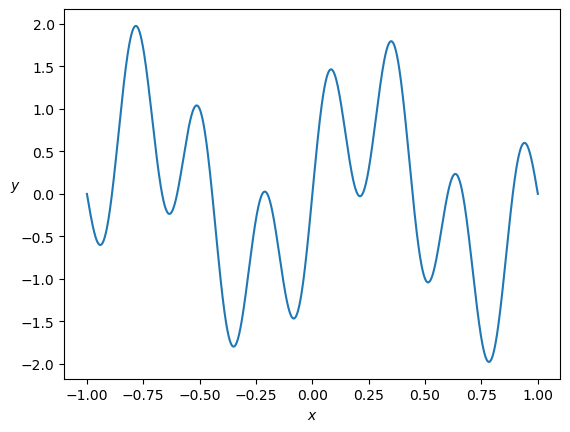

In [7]:
def f(x):
    y = np.sin(2.0*np.pi*x) + np.sin(7.0*np.pi*x)
    return y
h = 0.001
x = np.arange(-1.0,1.0+h,h)
y = f(x)
plt.plot(x,y)
plt.xlabel('$x$')
plt.ylabel('$y$',rotation=0)
plt.show()

Our data here are the points `x` and `y`. We split our data into training and testing data. We use 75% of our data for training purposes. 

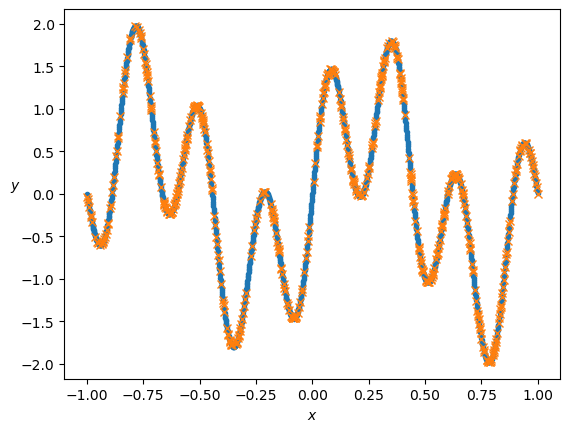

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
plt.plot(x_train, y_train, '.', x_test, y_test,'x')
plt.xlabel('$x$')
plt.ylabel('$y$',rotation=0)
plt.show()

Then we use the `MLPRegressor` to train our network

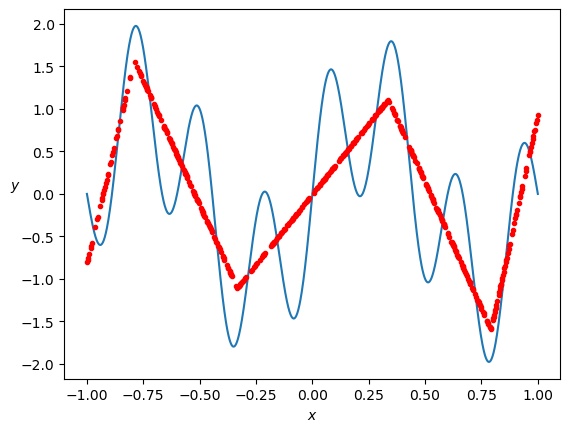

In [9]:
# reshape the date into (N,1)-dimensional array
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
from sklearn.neural_network import MLPRegressor
# setup the network
mlp = MLPRegressor(hidden_layer_sizes=[100],max_iter=1000)
# train the network
mlp.fit(x_train,y_train)
# use the trained network to obtain results
predictions = mlp.predict(x_test)
plt.plot(x,y,x_test, predictions, 'r.')
plt.xlabel('$x$')
plt.ylabel('$y$',rotation=0)
plt.show()

To improve the results we introduce six hidden layers with `[20, 50, 50, 50, 50, 20]` neurons

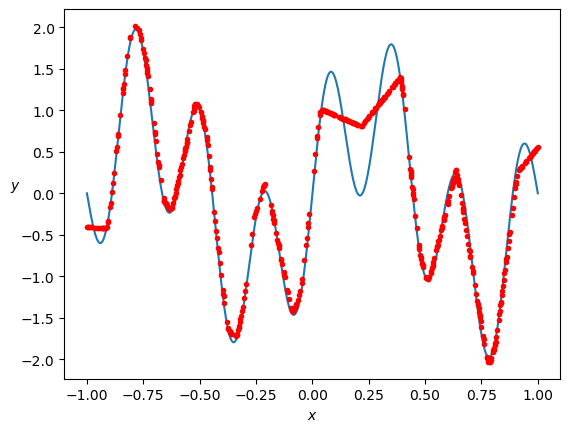

In [10]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=[20,50,50,50,50,20],max_iter=1000)
mlp.fit(x_train,y_train)
predictions = mlp.predict(x_test)
plt.plot(x,y,x_test, predictions, 'r.')
plt.xlabel('$x$')
plt.ylabel('$y$',rotation=0)
plt.show()

### Application in image recognition

We present an application in image recognition and in particular the hand-written digits recognition. This problem also lies in the chategory of classification problems and we use the function `MLPClassifier`. 

In this application we consider the `sklearn` dataset with hand-written diggits:

In [11]:
from sklearn import datasets
digits = datasets.load_digits()

We print the first 10 digits

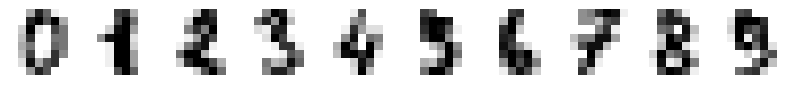

In [12]:
figure, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for i in range(10):
    axes[i].set_axis_off()
    axes[i].imshow(digits.images[i],cmap='binary')
plt.show()

This dataset consists of 1797 digits each of which is stored in an $8\times 8$ array.

As a first step we consider a simple neural network with 64 neurons for the input layer. Each neuron corresponds to a pixel. We will also consider a hidden layer of 15 neurons and an output layer with 10 neurons for the digits 0 to 9. 

Since the input layer is a vector of $64$ entries, we need to reshape the input images and transform them into `(64,)` vectors, and store them as columns of an array `x` instead of square $8\times 8$ arrays.

In [13]:
x = digits.images.reshape((len(digits.images), -1))
print(x.shape)

(1797, 64)


We take the first 1000 images to be used for training and the remaining 797 for testing

In [14]:
x_train, x_test, y_train, y_test = train_test_split(
    x, digits.target, test_size=797/1797, shuffle=False)

Then we train the network with the given data

In [15]:
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(hidden_layer_sizes=[15], activation='logistic',
                    solver='sgd', learning_rate_init=.1, verbose=True)

NN.fit(x_train,y_train)

Iteration 1, loss = 2.20051601
Iteration 2, loss = 1.89971937
Iteration 3, loss = 1.63162825
Iteration 4, loss = 1.35050021
Iteration 5, loss = 1.08975568
Iteration 6, loss = 0.87537402
Iteration 7, loss = 0.70975945
Iteration 8, loss = 0.57996259
Iteration 9, loss = 0.47942629
Iteration 10, loss = 0.41517632
Iteration 11, loss = 0.35700816
Iteration 12, loss = 0.31595357
Iteration 13, loss = 0.27754924
Iteration 14, loss = 0.24990498
Iteration 15, loss = 0.22150691
Iteration 16, loss = 0.20414251
Iteration 17, loss = 0.18945607
Iteration 18, loss = 0.17592474
Iteration 19, loss = 0.16058167
Iteration 20, loss = 0.14770193
Iteration 21, loss = 0.13803820
Iteration 22, loss = 0.13232087
Iteration 23, loss = 0.12476361
Iteration 24, loss = 0.12379333
Iteration 25, loss = 0.11146784
Iteration 26, loss = 0.11041673
Iteration 27, loss = 0.10174189
Iteration 28, loss = 0.09795784
Iteration 29, loss = 0.09637356
Iteration 30, loss = 0.09059869
Iteration 31, loss = 0.08647558
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=[15],
              learning_rate_init=0.1, solver='sgd', verbose=True)

We using the testing data to verify how well the neural network predicted the values

In [16]:
predictions = NN.predict(x_test)
print('predicted values=', predictions[:50])
print('exact values=', y_test[:50])

predicted values= [1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 4 9 0 8 9 8 0 1 2 3 4 5 6 7
 2 9 0 1 2 3 4 5 6 7 8 9 0]
exact values= [1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 4 9 0 8 9 8 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0]


Using the following command we can see that not every digit was predicted correctly.

In [17]:
print('errors', predictions[:50]==y_test[:50])

errors [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True]


Of course human make mistakes, why not computers?